# CSE 4/573: Intro to Computer Vision and Image Processing

<div>
<iframe src="https://slides.com/naresh-ub/slides-demo/embed" width="100%" height="500" title="Test Title" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div>

In [4]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from numpy.lib.stride_tricks import as_strided
from skimage.data import astronaut

def update_blur(kernel_size):
    blurred_image = apply_convolution(original_image, kernel_size)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image.astype(np.uint8))
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(blurred_image)
    plt.title(f"Blurred Image (Kernel: {kernel_size}x{kernel_size})")
    plt.axis("off")
    plt.show()
    
def apply_convolution(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
    if len(image.shape) == 3:
        filtered_image = np.stack([convolve2d_custom(image[:, :, c], kernel) for c in range(3)], axis=-1)
    else:
        filtered_image = convolve2d_custom(image, kernel)
    return np.clip(filtered_image, 0, 255).astype(np.uint8)

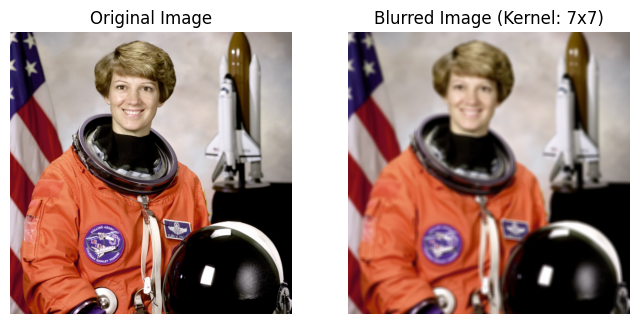

In [ ]:
# Required packages are already imported
original_image = astronaut().astype(np.float32)

def convolve2d_custom(image, kernel):
    h, w = image.shape
    k, _ = kernel.shape
    pad = k // 2
    padded_image = np.pad(image, pad, mode='edge')
    strided_shape = (h, w, k, k)
    strided_steps = padded_image.strides + padded_image.strides
    image_windows = as_strided(padded_image, shape=strided_shape, strides=strided_steps)
    return np.tensordot(image_windows, kernel, axes=([2, 3], [0, 1]))

# The code below is to visualize the results. Do not remove.
kernel_slider = widgets.IntSlider(min=3, max=21, step=2, value=3, description="Kernel Size")
widgets.interactive(update_blur, kernel_size=kernel_slider)

In [2]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()